<a href="https://colab.research.google.com/github/Akshay-D2089/Bigmart-sales-repo/blob/main/Copy_of_BigMart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting the sales for the data supplied by BigMart. For the given data we will first import all the related regression models. 

In [ ]:
#Importing the numpy, pandas, matplotlib, sklearn and all other related regression models 
 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
 
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
#converting the training and test csv file into the pandas readable format.

train_df = pd.read_csv("drive/MyDrive/BigMart Data/Train.csv", low_memory=False)
test_df = pd.read_csv("drive/MyDrive/BigMart Data/Test.csv", low_memory=False)




In [ ]:
#making a copy of test data to format later
test_df_1 = test_df

In [ ]:
#checking the training data in pandas format

train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
test_df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Going through the missing values of each columns

train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test_df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# ***Pre-processing the Data and filling the NaN values***

As we can see that we have missing values in the column "item_weight" and "Outlet_Size". We will fill those missing values and as well as convert the object column into the numerical data.

In [ ]:
#converting the object values in the type columns in the numerical values by using the fuction of dummies

train_df = pd.get_dummies(train_df, columns=["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"])
test_df_1 = pd.get_dummies(test_df, columns=["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"])

In [ ]:
train_df.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   object 
 1   Item_Weight                    7060 non-null   float64
 2   Item_Visibility                8523 non-null   float64
 3   Item_Type                      8523 non-null   object 
 4   Item_MRP                       8523 non-null   float64
 5   Outlet_Identifier              8523 non-null   object 
 6   Outlet_Establishment_Year      8523 non-null   int64  
 7   Item_Outlet_Sales              8523 non-null   float64
 8   Item_Fat_Content_LF            8523 non-null   uint8  
 9   Item_Fat_Content_Low Fat       8523 non-null   uint8  
 10  Item_Fat_Content_Regular       8523 non-null   uint8  
 11  Item_Fat_Content_low fat       8523 non-null   uint8  
 12  Item_Fat_Content_reg           8523 non-null   u

In [ ]:
train_df.isna().sum()

Item_Identifier                     0
Item_Weight                      1463
Item_Visibility                     0
Item_Type                           0
Item_MRP                            0
Outlet_Identifier                   0
Outlet_Establishment_Year           0
Item_Outlet_Sales                   0
Item_Fat_Content_LF                 0
Item_Fat_Content_Low Fat            0
Item_Fat_Content_Regular            0
Item_Fat_Content_low fat            0
Item_Fat_Content_reg                0
Outlet_Size_High                    0
Outlet_Size_Medium                  0
Outlet_Size_Small                   0
Outlet_Location_Type_Tier 1         0
Outlet_Location_Type_Tier 2         0
Outlet_Location_Type_Tier 3         0
Outlet_Type_Grocery Store           0
Outlet_Type_Supermarket Type1       0
Outlet_Type_Supermarket Type2       0
Outlet_Type_Supermarket Type3       0
dtype: int64

As we can see we still have some of the items in the columns as objects, we will try to convert those items in the categories by using the categories functions

In [ ]:
#converting the remaining string values into the categorical values

for label, items in train_df.items():
  if pd.api.types.is_string_dtype(items):
    train_df[label] = items.astype("category").cat.as_ordered()

In [ ]:
train_df.head(5)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Item_Identifier                8523 non-null   category
 1   Item_Weight                    7060 non-null   float64 
 2   Item_Visibility                8523 non-null   float64 
 3   Item_Type                      8523 non-null   category
 4   Item_MRP                       8523 non-null   float64 
 5   Outlet_Identifier              8523 non-null   category
 6   Outlet_Establishment_Year      8523 non-null   int64   
 7   Item_Outlet_Sales              8523 non-null   float64 
 8   Item_Fat_Content_LF            8523 non-null   uint8   
 9   Item_Fat_Content_Low Fat       8523 non-null   uint8   
 10  Item_Fat_Content_Regular       8523 non-null   uint8   
 11  Item_Fat_Content_low fat       8523 non-null   uint8   
 12  Item_Fat_Content_reg           852

In [ ]:
for label, items in train_df.items():
  if pd.api.types.is_numeric_dtype(items):
    if pd.isnull(items).sum():
      train_df[label] = items.fillna(items.median())
      

In [ ]:
train_df.isna().sum()

Item_Identifier                  0
Item_Weight                      0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Item_Outlet_Sales                0
Item_Fat_Content_LF              0
Item_Fat_Content_Low Fat         0
Item_Fat_Content_Regular         0
Item_Fat_Content_low fat         0
Item_Fat_Content_reg             0
Outlet_Size_High                 0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 1      0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
dtype: int64

In [ ]:
for label, items in train_df.items():
  if not pd.api.types.is_numeric_dtype(items):
    #Turn categories into numbers
    train_df[label] = pd.Categorical(items).codes+1
    

In [ ]:
train_df.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,157,9.30,0.016047,5,249.8092,10,1999,3735.1380,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,9,5.92,0.019278,15,48.2692,4,2009,443.4228,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,663,17.50,0.016760,11,141.6180,10,1999,2097.2700,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8523 non-null   int16  
 1   Item_Weight                    8523 non-null   float64
 2   Item_Visibility                8523 non-null   float64
 3   Item_Type                      8523 non-null   int8   
 4   Item_MRP                       8523 non-null   float64
 5   Outlet_Identifier              8523 non-null   int8   
 6   Outlet_Establishment_Year      8523 non-null   int64  
 7   Item_Outlet_Sales              8523 non-null   float64
 8   Item_Fat_Content_LF            8523 non-null   uint8  
 9   Item_Fat_Content_Low Fat       8523 non-null   uint8  
 10  Item_Fat_Content_Regular       8523 non-null   uint8  
 11  Item_Fat_Content_low fat       8523 non-null   uint8  
 12  Item_Fat_Content_reg           8523 non-null   u

In [ ]:
test_df_1.isna().sum()

Item_Identifier                    0
Item_Weight                      976
Item_Visibility                    0
Item_Type                          0
Item_MRP                           0
Outlet_Identifier                  0
Outlet_Establishment_Year          0
Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Outlet_Size_High                   0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 1        0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
Outlet_Type_Grocery Store          0
Outlet_Type_Supermarket Type1      0
Outlet_Type_Supermarket Type2      0
Outlet_Type_Supermarket Type3      0
dtype: int64

In [ ]:
test_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                5681 non-null   object 
 1   Item_Weight                    4705 non-null   float64
 2   Item_Visibility                5681 non-null   float64
 3   Item_Type                      5681 non-null   object 
 4   Item_MRP                       5681 non-null   float64
 5   Outlet_Identifier              5681 non-null   object 
 6   Outlet_Establishment_Year      5681 non-null   int64  
 7   Item_Fat_Content_LF            5681 non-null   uint8  
 8   Item_Fat_Content_Low Fat       5681 non-null   uint8  
 9   Item_Fat_Content_Regular       5681 non-null   uint8  
 10  Item_Fat_Content_low fat       5681 non-null   uint8  
 11  Item_Fat_Content_reg           5681 non-null   uint8  
 12  Outlet_Size_High               5681 non-null   u

In [ ]:
#Formatting the data in the test dataframe, same as for train dataframe 

#converting the object columns into the categories

for label, items in test_df_1.items():
  if pd.api.types.is_string_dtype(items):
    test_df_1[label] = items.astype("category").cat.as_ordered()
    

In [ ]:
for label, items in test_df_1.items():
  if pd.api.types.is_numeric_dtype(items):
    if pd.isnull(items).sum():
      test_df_1[label] = items.fillna(items.median())

In [ ]:
for label, items in test_df_1.items():
  if not pd.api.types.is_numeric_dtype(items):
    #Turn categories into numbers
    test_df_1[label] = pd.Categorical(items).codes+1

Now that all the values and missing data are formatted in the train and test dataframe, its time to visualise our data in graphs and maps. hence ot correlate the lables with each other and understand how each feature relates and influences the sales.

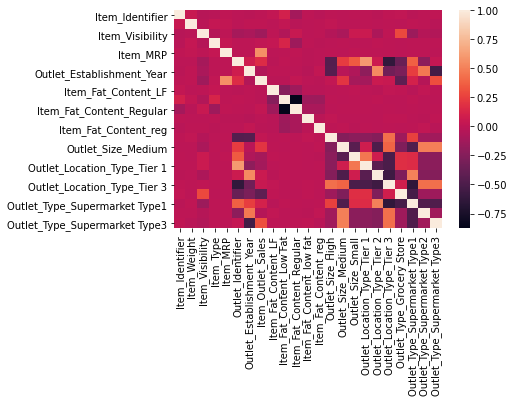

In [ ]:
%matplotlib inline

sns.heatmap(train_df.corr())

In [ ]:
train_df_corr = train_df[train_df.columns[:]].corr()["Item_Outlet_Sales"][:]
train_df_corr = train_df_corr.drop("Item_Outlet_Sales")
train_df_corr

Item_Identifier                  0.002869
Item_Weight                      0.009693
Item_Visibility                 -0.128625
Item_Type                        0.017048
Item_MRP                         0.567574
Outlet_Identifier                0.162325
Outlet_Establishment_Year       -0.049135
Item_Fat_Content_LF             -0.012389
Item_Fat_Content_Low Fat        -0.011993
Item_Fat_Content_Regular         0.022618
Item_Fat_Content_low fat        -0.006326
Item_Fat_Content_reg            -0.015148
Outlet_Size_High                 0.024170
Outlet_Size_Medium               0.204701
Outlet_Size_Small               -0.098403
Outlet_Location_Type_Tier 1     -0.111287
Outlet_Location_Type_Tier 2      0.058261
Outlet_Location_Type_Tier 3      0.046376
Outlet_Type_Grocery Store       -0.411727
Outlet_Type_Supermarket Type1    0.108765
Outlet_Type_Supermarket Type2   -0.038059
Outlet_Type_Supermarket Type3    0.311192
Name: Item_Outlet_Sales, dtype: float64

So from the above information we know that some features positively correlate to the item out sales. the most impotant factor tha influences the sale is the item mrp followed by the outlet supermarket type 3 and so on. Let us visualise this correlation.

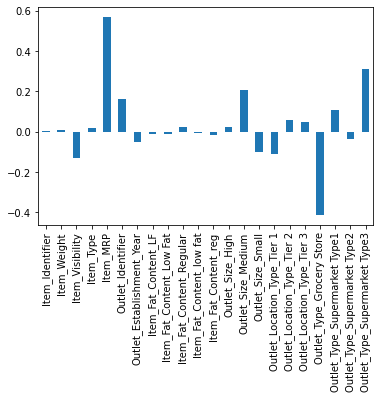

In [ ]:
train_df_corr.plot.bar()

as now we have visualised the features, we further move to train the model to our data as to predict future sales. We will start with the spliting the data into train test and fitting the different regression models to it.

In [ ]:
#Splitting the Data using the train test split function

X = train_df.drop(["Item_Outlet_Sales"], axis=1)
y = train_df["Item_Outlet_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, stratify=None)

In [ ]:
#Checking the newly formed trained set

X_train.head(3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,157,9.30,0.016047,5,249.8092,10,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,9,5.92,0.019278,15,48.2692,4,2009,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,663,17.50,0.016760,11,141.6180,10,1999,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


Lets have the baseline score for the given data. This baseline score will be helpful in determining how the model will perform and score

In [ ]:
mean_sales = train_df["Item_Outlet_Sales"].mean()
mean_sales

2181.2889135750365

In [ ]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error


In [ ]:
#Function for fitting and scoring the models


def model(mod, X_train, X_test, y_train, y_test):
  #Fitting the model on the data
  mod.fit(X_train, y_train)

  #predict the model
  y_preds = mod.predict(X_test)

  #Crossvalidation
  cross_val = cross_val_score(mod, X, y, scoring="neg_mean_squared_error", cv=5)
  cross_val = np.sqrt(np.abs(cross_val))

  #print model report
  print("Model report")
  print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
  print("CV_score: ", np.mean(cross_val))
  

In [ ]:
#Fitting the RandomForestRegressor model
np.random.seed(42)

rf = RandomForestRegressor(n_estimators=100)

model(rf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)





Model report
RMSE:  1136.1966982751578
CV_score:  1141.3936220676605


In [ ]:
#Fitting LinearRegression
np.random.seed(42)
Lr = LinearRegression()
model(Lr, X_train, X_test, y_train, y_test)


Model report
RMSE:  1140.98892569978
CV_score:  1129.9385207688563


In [ ]:
#Fitting KnieghborsRegression
np.random.seed(42)

kn = KNeighborsRegressor()
model(kn, X_train, X_test, y_train, y_test)

Model report
RMSE:  1556.2200593262708
CV_score:  1540.8530561712705


In [ ]:
#Fitting DecisionTreeRegressor
np.random.seed(42)

dtr = DecisionTreeRegressor()
model(dtr, X_train, X_test, y_train, y_test)


Model report
RMSE:  1553.847559870619
CV_score:  1573.5077233952777


In [ ]:
#Fitting ExtraTreesRegressor
np.random.seed(42)

etr = ExtraTreesRegressor(n_estimators=100)
model(etr, X_train, X_test, y_train, y_test)


Model report
RMSE:  1178.3863476673157
CV_score:  1159.7116957057021


Now we have fit allt he regressor models on the training set and have the respective scores. From the above results, I will opt with ***RandomForestRegressor*** as it  has given a good score and according to CV score the model is not overfitting or underfitting. As we know there is always scope for making the model score better with hyperparameters tuning, for now I will opt the model with default tunings


In [ ]:
#Checking the Test dataframe 
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


As the final output and the prediction of the model is expected with regards to Item_Identifier, Outlet_Identifier, we will make a new dataframe from the original test dataset.

In [ ]:
#Making the dataframe consisting of Item_Identifier and Outlet_Identifier, from the original test dataset
 
test_dataframe = test_df[["Item_Identifier", "Outlet_Identifier"]]

In [ ]:
#predicting our RandomForestRegressor model on the formatted test data and joining it as column in our new dataframe 

test_dataframe["Item_Outlet_Sales"] = rf.predict(test_df_1)
test_dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1625.930206
1,FDW14,OUT017,1093.969322
2,NCN55,OUT010,626.211532
3,FDQ58,OUT017,2505.938040
4,FDY38,OUT027,6122.510376
